In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import zipfile as zip

In [ ]:
data = pd.read_csv('./Cleaned_data_for_model.csv')

data.head()


,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Area_in_Marla", "baths", "bedrooms"]),
    (OneHotEncoder(handle_unknown="ignore"), ["property_type", "location", "city", "purpose"])
)

squeezedData = data.drop('Unnamed: 0', axis=1)

X = squeezedData.drop('price', axis=1)
y = squeezedData['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normalised = ct.transform(X_train)
X_test_normalised = ct.transform(X_test)
y_train_normalised = y_train.to_numpy()
y_test_normalised = y_test.to_numpy()

In [ ]:
X_train = X_train_normalised.astype('float32')
y_train = y_train_normalised.astype('float32')

In [ ]:
tf.random.set_seed(42)

houseModel = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

houseModel.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

houseModel.fit(X_train, y_train, epochs=100)

Epoch 1/100
2488/2488 [==============================] - 13s 5ms/step - loss: 6163414.0000 - mae: 6163414.0000
Epoch 2/100
2488/2488 [==============================] - 10s 4ms/step - loss: 4674787.0000 - mae: 4674787.0000
Epoch 3/100
2488/2488 [==============================] - 9s 4ms/step - loss: 4554394.0000 - mae: 4554394.0000
Epoch 4/100
2488/2488 [==============================] - 9s 4ms/step - loss: 4479294.0000 - mae: 4479294.0000
Epoch 5/100
2488/2488 [==============================] - 10s 4ms/step - loss: 4425551.5000 - mae: 4425551.5000
Epoch 6/100
2488/2488 [==============================] - 10s 4ms/step - loss: 4383803.0000 - mae: 4383803.0000
Epoch 7/100
2488/2488 [==============================] - 10s 4ms/step - loss: 4352306.5000 - mae: 4352306.5000
Epoch 8/100
2488/2488 [==============================] - 10s 4ms/step - loss: 4325761.0000 - mae: 4325761.0000
Epoch 9/100
2488/2488 [==============================] - 10s 4ms/step - loss: 4302598.0000 - mae: 4302598.0000
Epo

In [ ]:
houseModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                13480     
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13491 (52.70 KB)
Trainable params: 13491 (52.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train.mean()

10356065.0

In [ ]:
houseModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                13480     
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13491 (52.70 KB)
Trainable params: 13491 (52.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Xm

<Axes: ylabel='Frequency'>

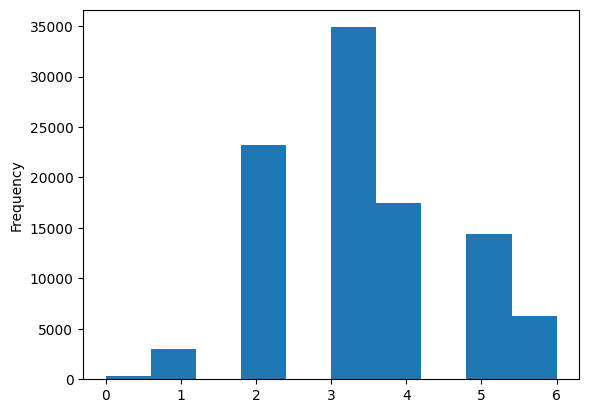

In [ ]:
X['bedrooms'].plot(kind='hist')

In [ ]:
X

,property_type,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,E-11,Islamabad,3,For Sale,3,5.6
2,House,G-15,Islamabad,6,For Sale,5,8.0
3,House,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...
99494,Flat,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,House,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,House,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,House,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


from matplotlib import pyplot as plt
X['baths'].plot(kind='hist', bins=20, title='baths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['Area_in_Marla'].plot(kind='hist', bins=20, title='Area_in_Marla')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('property_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='baths', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='bedrooms', y='Area_in_Marla', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['baths'].plot(kind='line', figsize=(8, 4), title='baths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['Area_in_Marla'].plot(kind='line', figsize=(8, 4), title='Area_in_Marla')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['city'].value_counts()
    for x_label, grp in X.groupby('property_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('property_type')
_ = plt.ylabel('city')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['purpose'].value_counts()
    for x_label, grp in X.groupby('city')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('city')
_ = plt.ylabel('purpose')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['property_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='baths', y='property_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='baths', y='city', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['purpose'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='baths', y='purpose', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['property_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='bedrooms', y='property_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
tf.random.set_seed(42)

houseModel_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1347, input_shape=(X_train_normalised.shape[1],), activation='relu'),
  tf.keras.layers.Dense(1347, activation='relu'),
  # tf.keras.layers.Dense(137, activation='relu'),
  # tf.keras.layers.Dense(13, activation='relu'),
  tf.keras.layers.Dense(1)
])

houseModel_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

houseModel_3.fit(X_train_normalised, y_train, epochs=10)

Epoch 1/10
2488/2488 [==============================] - 17s 6ms/step - loss: 3263450.2500 - mae: 3263450.2500
Epoch 2/10
2488/2488 [==============================] - 13s 5ms/step - loss: 2260104.7500 - mae: 2260104.7500
Epoch 3/10
2488/2488 [==============================] - 12s 5ms/step - loss: 2111023.5000 - mae: 2111023.5000
Epoch 4/10
2488/2488 [==============================] - 12s 5ms/step - loss: 2046478.1250 - mae: 2046478.1250
Epoch 5/10
2488/2488 [==============================] - 12s 5ms/step - loss: 2004791.7500 - mae: 2004791.7500
Epoch 6/10
2488/2488 [==============================] - 12s 5ms/step - loss: 1973714.5000 - mae: 1973714.5000
Epoch 7/10
2488/2488 [==============================] - 12s 5ms/step - loss: 1957799.1250 - mae: 1957799.1250
Epoch 8/10
2488/2488 [==============================] - 12s 5ms/step - loss: 1947608.6250 - mae: 1947608.6250
Epoch 9/10
2488/2488 [==============================] - 12s 5ms/step - loss: 1934391.1250 - mae: 1934391.1250
Epoch 10/1